In [1]:
import pickle
import numpy as np
def psave(filename, object):
    file_write=open(filename, "wb")
    pickle.dump(object, file_write)
    file_write.close()
    return
def pload(filename):
    file_read=open(filename,mode="rb")
    file = pickle.load(file_read)
    file_read.close()
    return file

In [2]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt

In [3]:
raw_s2,dp_s2,p_10,data_s2,label_s2,projs=pload("data.list")

In [4]:
dict_train=pload("dict_train.dict")

In [5]:
n_simlations,n_features,data_shape,step_size,tot_time_frame=pload("sim_arguments.list")
n_step=tot_time_frame/step_size

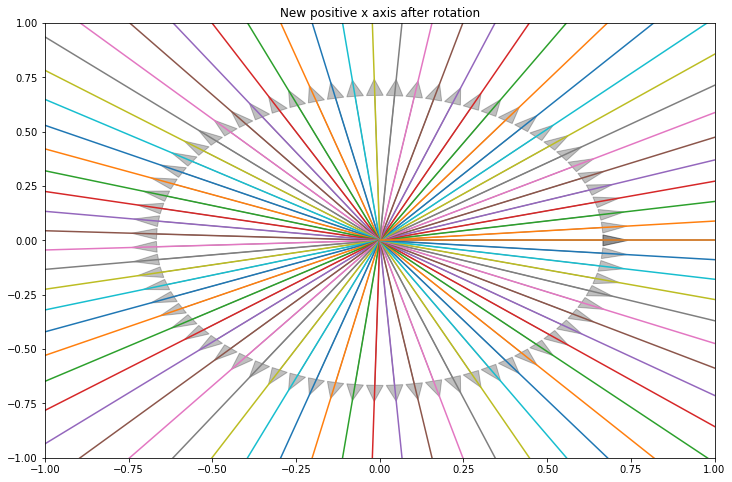

In [6]:
plt.figure(figsize=(12,8))
p_10.show_axis()

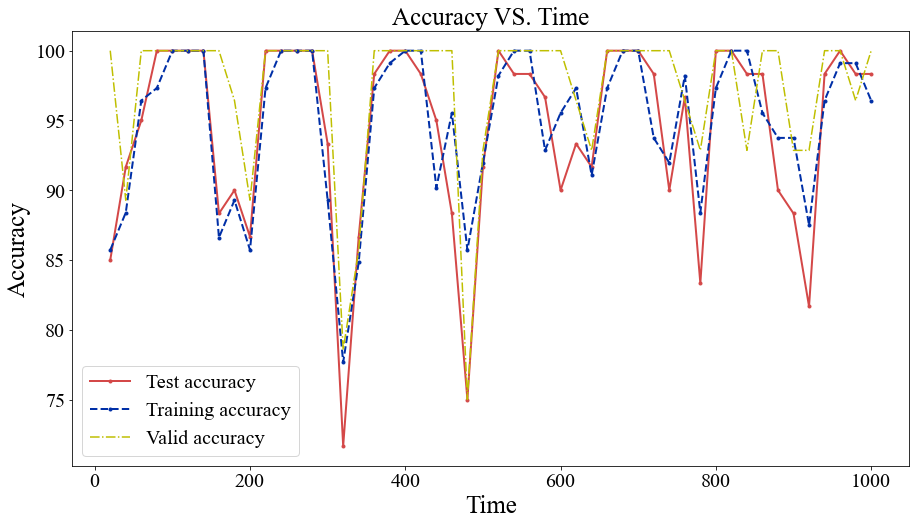

In [7]:
x = [step_size*(i+1) for i in range (len(dict_train))]
test=[ dict_train[v]["accuracy"][2][1]*100 for v in range (len(dict_train))]
valid=[ max(dict_train[z]["accuracy"][1])*100 for z in range (len(dict_train))]
train=[ max(dict_train[t]["accuracy"][0])*100 for t in range (len(dict_train))]

plt.figure(figsize=(15,8))
plt.title("Accuracy VS. Time",fontdict={"family": "Times New Roman", "size": 25})
plt.plot(x, test,color=(212/255,72/255,72/255), linewidth=2,marker="o",markersize=3,label="Test accuracy")
plt.plot(x, train,"--" ,color=(0/255, 47/255, 167/255),linewidth=2,marker="o",markersize=3,label="Training accuracy")
plt.plot(x, valid, "y-.", label="Valid accuracy")
plt.legend(prop={"family": "Times New Roman", "size": 20})
plt.xticks(fontname="Times New Roman", fontsize=20)
plt.yticks(fontname="Times New Roman", fontsize=20)
plt.xlabel('Time',fontdict={"family": "Times New Roman", "size": 25})
plt.ylabel('Accuracy',fontdict={"family": "Times New Roman", "size": 25})
plt.show()

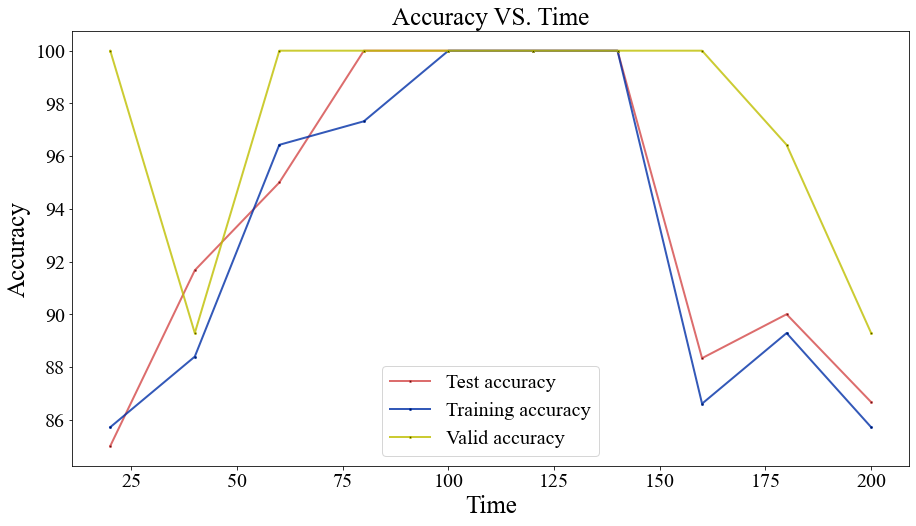

In [8]:
def view_acc(data,step_size,time_edge):
    steps_to_view=int(time_edge/step_size)
    x = [step_size*(i+1) for i in range (steps_to_view)]
    test=[ dict_train[v]["accuracy"][2][1]*100 for v in range (steps_to_view)]
    valid=[ max(dict_train[z]["accuracy"][1])*100 for z in range (steps_to_view)]
    train=[ max(dict_train[t]["accuracy"][0])*100 for t in range (steps_to_view)]

    lsize=2
    msize=2
    mcolor="black"
    al=0.8

    plt.figure(figsize=(15,8))
    plt.title("Accuracy VS. Time",fontdict={"family": "Times New Roman", "size": 25})
    plt.plot(x, test,color=(212/255,72/255,72/255), linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Test accuracy")
    plt.plot(x, train,"-" ,color=(0/255, 47/255, 167/255),linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Training accuracy")
    plt.plot(x, valid, "y-", linewidth=lsize,marker="o",markersize=msize,markerfacecolor=mcolor,alpha=al,label="Valid accuracy")
    plt.legend(prop={"family": "Times New Roman", "size": 20})
    plt.xticks(fontname="Times New Roman", fontsize=20)
    plt.yticks(fontname="Times New Roman", fontsize=20)
    plt.xlabel('Time',fontdict={"family": "Times New Roman", "size": 25})
    plt.ylabel('Accuracy',fontdict={"family": "Times New Roman", "size": 25})
    plt.savefig("s2_acc_{}".format(time_edge))
view_acc(dict_train,step_size,200)

Text(0.5, 0, 'Feature')

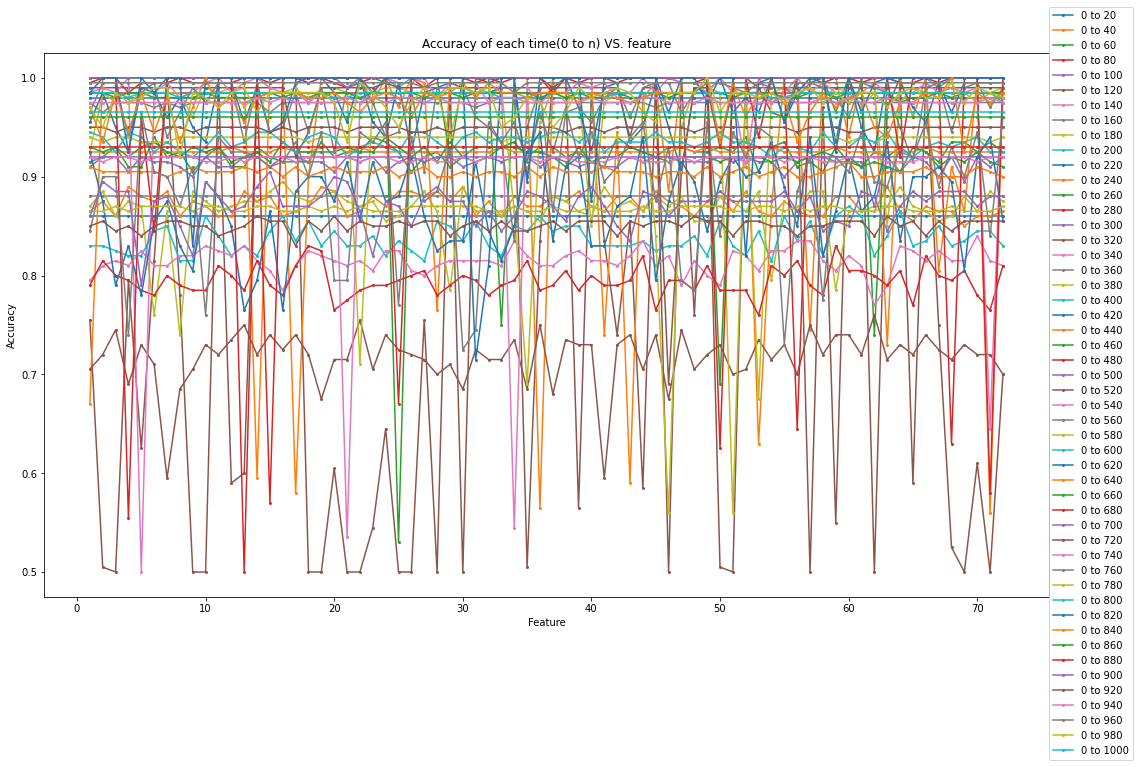

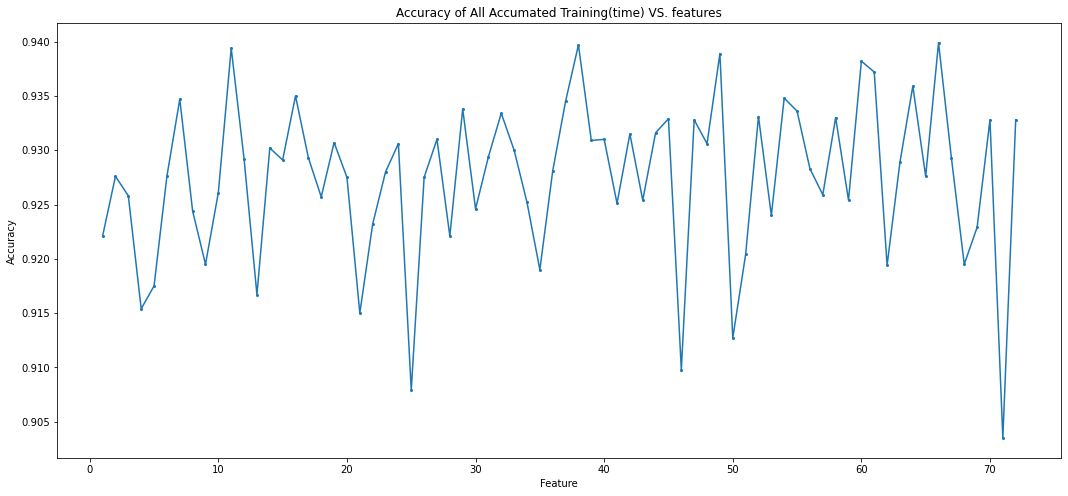

In [9]:
adrops = []
plt.figure(figsize=(18,10))
plt.title("Accuracy of each time(0 to n) VS. feature")
feature_x=[i+1 for i in range(n_features)] # x coordinate for n_featuers features  
all_adrops=[]
for run in range(len(dict_train)):
#     plt.figure()
    adrop = dict_train[run]["mltsa"]
#     print(np.array(adrop).shape)
    mean = np.mean(adrop, axis=0)# calculate the mean feature data of 200 trajs
    adrops.append(mean)
    all_adrops.append(adrop)# load all the adrop data from dict train, for next steps
#     plt.plot(feature_x,np.mean(adrops, axis=0),label="0 to {}".format((run+1)*20)) #
    plt.plot(feature_x,mean,label="0 to {}".format((run+1)*20),marker='o',markersize=2)
    plt.legend(bbox_to_anchor=(1, -0.3), loc=3, borderaxespad=0)
plt.xlabel('Feature')
plt.ylabel('Accuracy')

# adrops, list, len:50, adrops[0] is the features accuracy of the first training 
plt.figure(figsize=(18,8))
plt.title("Accuracy of All Accumated Training(time) VS. features")
plt.plot(feature_x,np.mean(adrops, axis=0),marker='o',markersize=2)
plt.ylabel("Accuracy")
plt.xlabel("Feature")

In [10]:
def top_n_important_features(dict_train,time,step_size,time_frame,top_number=1):
    
    adrops = [] # the list to save all the mean adrop accuracy over time, by superimposing the accuracy of all previous time
    min_features_dict={}
    for i in range(int(time/step_size)):
        adrop = dict_train[i]["mltsa"] # get adrop data from dict_train, shape:(n_simulations,n_features)
        mean = np.mean(adrop, axis=0) # (72,) superposition of all simulations, shape(n_features)
        adrops.append(mean) # save the adroped features accuracy to the list by each time
    current_mean_adrops=np.mean(np.array(adrops),axis=0)# mean adrop array,
    no_rep_adrop=list(set(current_mean_adrops.tolist())) # eliminate elements of repetition: array->list->set->list

    if top_number>len(no_rep_adrop):
        raise ValueError("Your index is over the number of different accuracy of features, try smaller!") # check the index is not over the list length
    min_feature=np.min(no_rep_adrop)# find the minimum feature
    location=np.where(current_mean_adrops==min_feature)[0] # get the location of the minimum feature(s)

    if top_number > 1 : #  if the index is not the top 1 important adropped feature 
        for i in range(top_number-1):
            no_rep_adrop.remove(min_feature)# delete minimum feature(s)
            min_feature=np.min(no_rep_adrop)# find minimum feature(s) after deleting the last minimum feature(s)
            location=np.where(current_mean_adrops==min_feature)[0]# find the loation of the minimum feature(s)

    return location

top_n_important_features(dict_train,500,step_size,tot_time_frame,1)

array([45], dtype=int64)

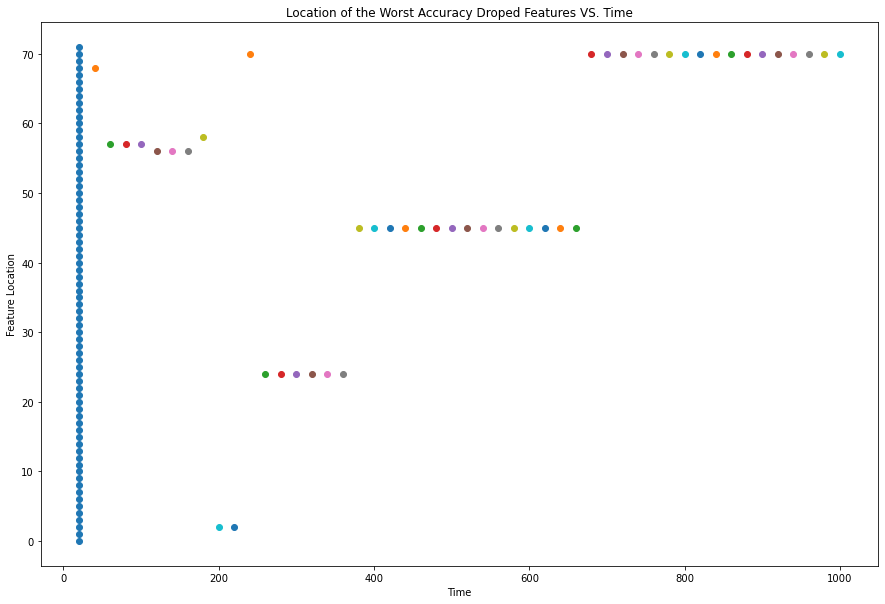

In [11]:
def most_important_features(dict_train):
    adrops = []
    min_dict={}
    num=0
    for run in range(len(dict_train)):
    #     plt.figure()
        adrop = dict_train[run]["mltsa"] # (200,72)
    #     print(np.array(adrop).shape) # (200,72)
        mean = np.mean(adrop, axis=0) # (72,)
        adrops.append(mean)
        time_mean_adrops=np.mean(np.array(adrops),axis=0)# (73,)
    #     print(time_mean_adrops.shape)
        min_feature=np.min(time_mean_adrops)
        location=np.where(time_mean_adrops==min_feature)[0]
        min_dict[num]=location
        num+=1
    return min_dict
# min_dict=most_important_features(dict_train)

def dots_plot_most_important_features(dict_train):
    min_dict=most_important_features(dict_train)
    plt.figure(figsize=(15,10))
    plt.title("Location of the Worst Accuracy Droped Features VS. Time",x=0.5,y=1)
    for time in range(len(min_dict)):
        plt.scatter([step_size*list(min_dict.keys())[time]+step_size]*min_dict[time].shape[0],min_dict[time])
    plt.ylabel("Feature Location")
    plt.xlabel("Time")
    
dots_plot_most_important_features(dict_train)

(-1.0, 1.0)

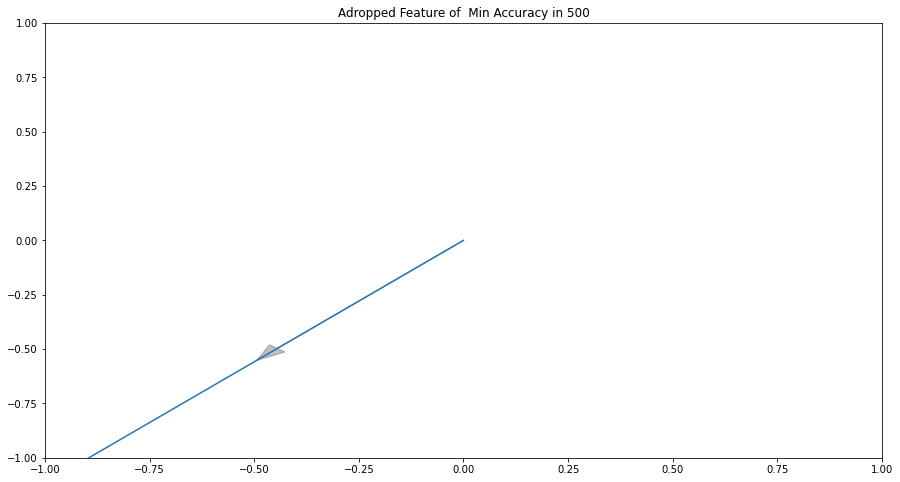

In [15]:
time=500
min_feature_list=top_n_important_features(dict_train,time,step_size,tot_time_frame,1)
plt.figure(figsize=(15,8))
plt.title("Adropped Feature of  Min Accuracy in {}".format(time))
for i in range(len(p_10.coeff)):
    if i in min_feature_list:
        theta = p_10.coeff[i]
        temp = [np.cos(theta) * 2, np.sin(theta) * 2]
        plt.plot([0,temp[0]],[0,temp[1]])
        plt.arrow(0, 0, temp[0]/3, temp[1]/3, width=0.001, head_width=0.05, alpha=0.25, color='black')
plt.xlim(-1,1)
plt.ylim(-1,1)

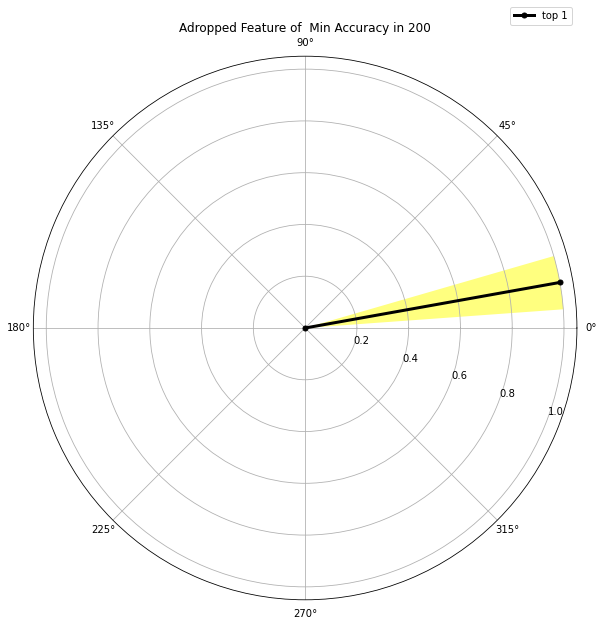

In [12]:
def draw_top_1_important_feature(dict_train,time,step_size,time_frame,top_number=1):
    min_feature_list=top_n_important_features(dict_train,time,step_size,time_frame,top_number)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(10, 10))
    plt.title("Adropped Feature of  Min Accuracy in {}".format(time))
    for i in range(len(p_10.coeff)):
        if i in min_feature_list:
            theta = p_10.coeff[i]
            temp = [np.cos(theta) * 2, np.sin(theta) * 2]
            ax.plot([0,theta],[0,1/top_number],label="top {}".format(top_number),color="black",linewidth=3,marker='o',markersize=5)# theta = rads, 5= line length
            ax.bar(theta,1/top_number, width=np.pi/15,color="yellow",alpha=0.5)
            ax.set_rlabel_position(-20)
    ax.legend(bbox_to_anchor=(1, 1.1))

draw_top_1_important_feature(dict_train,200,step_size,tot_time_frame,1)

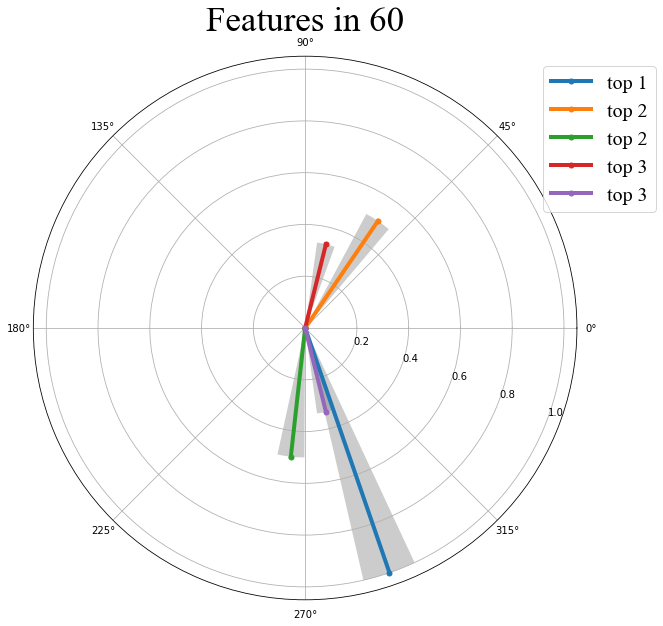

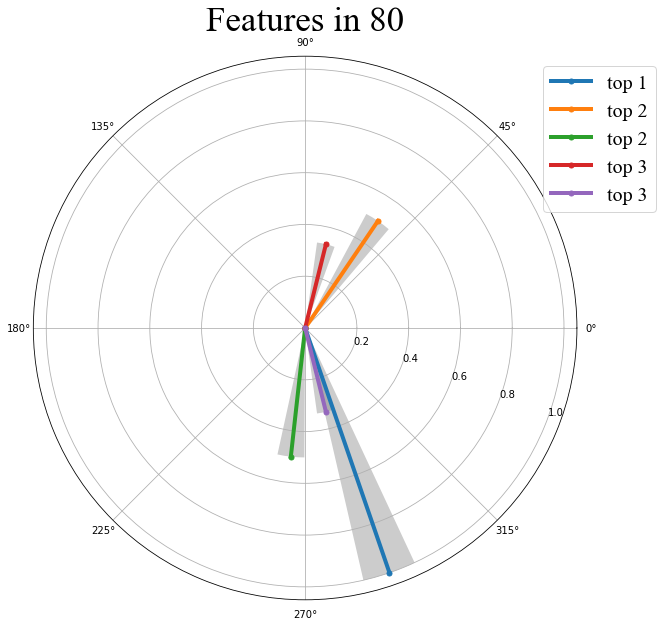

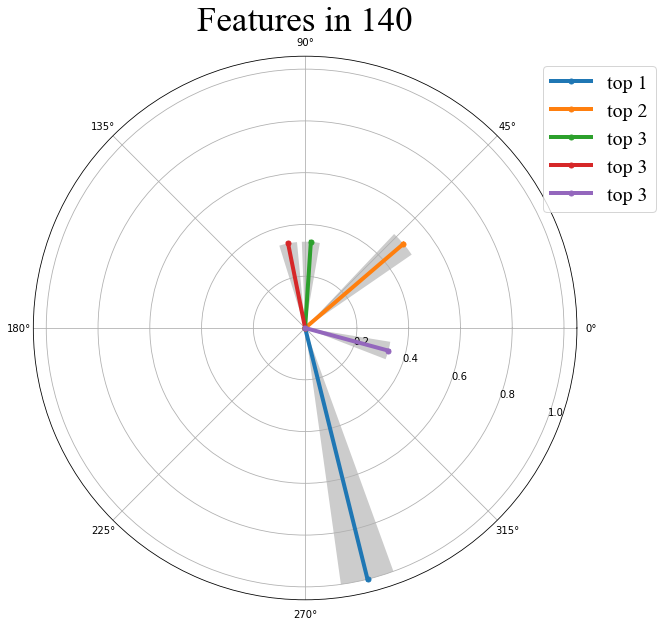

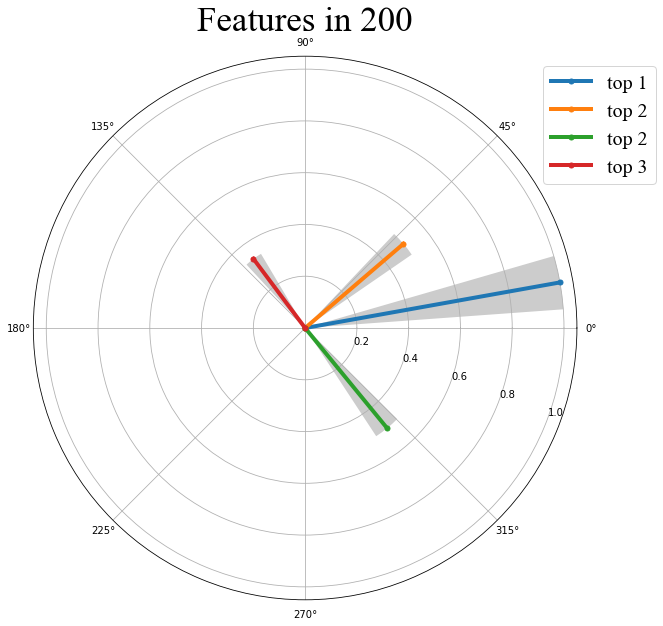

In [49]:
def draw_n_important_features(dict_train,time,step_size,time_frame,top_number=1):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(10, 10))
    for top in range(top_number):
        min_feature_list=top_n_important_features(dict_train,time,step_size,time_frame,top+1)
        plt.title("Features in {}".format(time),fontdict={"family": "Times New Roman", "size": 35})
        for i in range(len(p_10.coeff)):
            if i in min_feature_list:
                theta = p_10.coeff[i]
                temp = [np.cos(theta) * 2, np.sin(theta) * 2]
                ax.plot([0,theta],[0,1/(top+1)],label="top {}".format(top+1),linewidth=4,marker='o',markersize=5)# theta = rads, 5= line length
                ax.bar(theta,1/(top+1), width=np.pi/15,color="grey",alpha=0.4)
                ax.set_rlabel_position(-20)
        ax.legend(bbox_to_anchor=(1, 1.1))
    plt.legend(prop={"family": "Times New Roman", "size": 20},loc='upper left', bbox_to_anchor=(0.92,1))
    plt.savefig("2D_feature_{}.png".format(time))

draw_n_important_features(dict_train,60,step_size,tot_time_frame,3)
draw_n_important_features(dict_train,80,step_size,tot_time_frame,3)
draw_n_important_features(dict_train,140,step_size,tot_time_frame,3)
draw_n_important_features(dict_train,200,step_size,tot_time_frame,3)

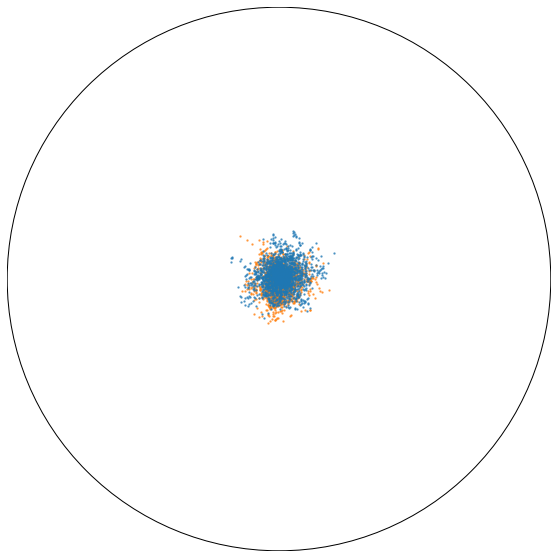

In [37]:
time=20
def plot_data(time,data_s2,label_s2):
    al=0.6
    radius=5
    ssize=2
    # plt.scatter( 0 , 0 , s=10000 ,  facecolors='none', edgecolors='blue' ) 
    cc = plt.Circle(( 0 , 0 ), radius , alpha=1,fill=None) 
    figure, axes = plt.subplots(figsize=(10, 10)) 
    axes.set_aspect( 1 ) 
    axes.add_artist( cc )

    for i in range(100,200):
        plt.scatter(data_s2[i,0,0:time], data_s2[i,1,0:time],s=ssize,c=f"C{label_s2[i]}",alpha=al)
    for i in range(100):
        plt.scatter(data_s2[i,0,0:time], data_s2[i,1,0:time],s=ssize,c=f"C{label_s2[i]}", alpha=al)  
    plt.xlim(-radius,radius)
    plt.ylim(-radius,radius)
    plt.xticks([]) # 
    plt.yticks([]) # 
    plt.axis('off')
    plt.savefig("clean_data_time_{}".format(time))
plot_data(time,data_s2,label_s2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


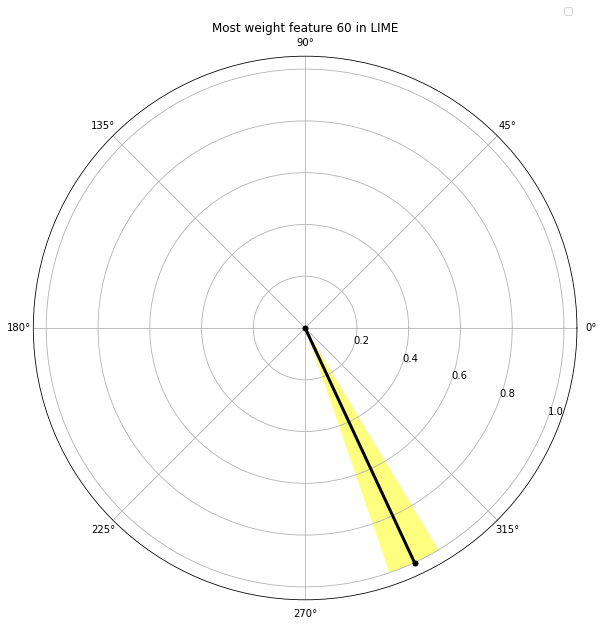

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def draw_feature(feature):

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=(10, 10))
    plt.title("Most weight feature {} in LIME".format(feature))

    theta = (feature-1)*5*(np.pi/180)
    ax.plot([0,theta],[0,1],color="black",linewidth=3,marker='o',markersize=5)# theta = rads, 5= line length
    ax.bar(theta,1, width=np.pi/15,color="yellow",alpha=0.5)
    ax.set_rlabel_position(-20)
    ax.legend(bbox_to_anchor=(1, 1.1))
draw_feature(60)

In [32]:
exp_80=pload("lime_80.instance")

In [58]:
exp_80.show_in_notebook( show_table=True, show_all=True)

In [129]:
test

array([[[1, 2],
        [3, 4],
        [4, 5]]])

In [130]:
test.shape

(1, 3, 2)

In [131]:
test=np.mean(test,axis=0)

In [132]:
test.shape

(3, 2)

In [133]:
test

array([[1., 2.],
       [3., 4.],
       [4., 5.]])

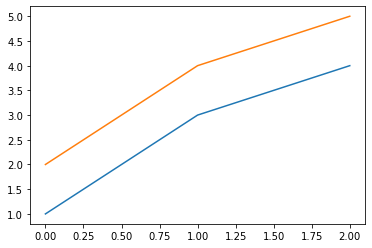

In [134]:
plt.plot(test)